In [1]:
# Import modues
# -*- encoding: utf-8 -*-
import numpy as np
import matplotlib as mpl
from matplotlib import rc
import math
import pandas as pd
import os
import itertools
import scipy
from scipy import stats
from scipy import ndimage
import seaborn as sns

import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import *

from skimage import measure
from scipy import ndimage
from scipy import misc

from scipy.stats.stats import pearsonr, spearmanr
from collections import  Counter

# from pandas import ExcelWriter
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.stats.api as sm
from sklearn import cross_validation, datasets, linear_model, metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn import cross_validation, datasets, grid_search, linear_model, metrics

from scipy.optimize import curve_fit
from scipy import signal

from sklearn import random_projection
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import KMeans
import pickle
sns.set_style("whitegrid")
# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette('Accent')

rc('font', family='Arial')  # change font for russian

% matplotlib inline
print 'Import Ready'

Import Ready


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
# Classification function
def classif(all_data, all_labels, tdata=''):
    '''
    Function for optimmize classification and calculate main quality metrics.
    Return:
        outputs with data
    Parameters: 
        train_data
        train_labels
        test_data - data for test
        test_labels - labels for test 
        tdata
    '''
    
    # Split to train and test
    train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(all_data, all_labels,
                                            test_size=0.2,train_size=0.8,stratify=all_labels)
    print 'Test train-test split: ',
    print Counter(all_labels),
    print Counter(train_labels),
    print Counter(test_labels)
    # CV startegy and mertics
    cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.3, random_state=0)
    cv_metricks = cross_validation.StratifiedShuffleSplit(all_labels, n_iter = 10, test_size = 0.3, random_state=0)
    metrics_all = ['accuracy', 'precision_macro', 'f1_macro', 'recall_macro']
    metriks_names = ['accuracy', 'precision_macro', 'f1_macro', 'recall_macro']
    
    print '\tSGD Liner classifire:'
    log_regressor = linear_model.SGDClassifier(penalty='none', shuffle=True, random_state=0)
    # grid search
    parameters_grid = {
        'loss': ['hinge', 'log','squared_loss', 'modified_huber'],
        'fit_intercept': [True, False],
        'max_iter' : np.linspace(1000, 15000, 5, dtype=int)
    }
    grid_cv = grid_search.GridSearchCV(log_regressor, parameters_grid, scoring = 'f1_macro', cv = cv)
    grid_cv.fit(train_data, train_labels)
    print '  Best with grid search: '
    print '  estimator: ', grid_cv.best_estimator_
    print '  score: ', grid_cv.best_score_
    print '  parameters: ', grid_cv.best_params_
    print '  Features importamce: '
    a = train_data.columns
    imp = np.mean(np.abs(grid_cv.best_estimator_.coef_),0)
    b = imp / np.sum(imp) * 100.
    importances = pd.DataFrame(zip(a, b))
    importances.columns = ['feature name', 'importance']
    print '  ', importances.sort_values(by='importance', ascending=False)
    
    print "  Detailed classification report:"
    y_true, y_pred = test_labels, grid_cv.best_estimator_.predict(test_data)
    print '  ', classification_report(y_true, y_pred)
    
    for i in xrange(len(metrics_all)):
        scor = metrics_all[i]
        scoring = cross_validation.cross_val_score(grid_cv.best_estimator_, all_data, all_labels,
                                                     scoring = scor, cv = cv_metricks)
        print '  Best SGD Lin ' + metriks_names[i] + ' mean:{}, max:{}, min:{}, std:{}'.format(scoring.mean(), scoring.max(), 
                                                         scoring.min(), scoring.std())
        

    print
    ridge_classifier = linear_model.SGDClassifier(penalty='l2',shuffle=True, random_state=0)
    print '\tRidge Classifire (SGD with L2):'
    parameters_grid = {
        'loss': ['hinge', 'log','squared_loss', 'modified_huber'],
        'fit_intercept': [True, False],
        'max_iter': np.linspace(1000,15000, 5, dtype=int),  
        'alpha': np.linspace(0.0001, 1., num = 10) 
    }
    grid_cv = grid_search.GridSearchCV(ridge_classifier, parameters_grid, scoring = 'f1_macro', cv = cv)
    grid_cv.fit(train_data, train_labels)
    print '  Best with grid search: '
    print '  estimator: ', grid_cv.best_estimator_
    print '  score: ', grid_cv.best_score_
    print '  parameters: ', grid_cv.best_params_
    print '  Features importamce: '
    a = train_data.columns
    imp = np.mean(np.abs(grid_cv.best_estimator_.coef_),0)
    b = imp / np.sum(imp) * 100.
    importances = pd.DataFrame(zip(a, b))
    importances.columns = ['feature name', 'importance']
    print '  ', importances.sort_values(by='importance', ascending=False)
    
    print "  Detailed classification report:"
    y_true, y_pred = test_labels, grid_cv.best_estimator_.predict(test_data)
    print '  ', classification_report(y_true, y_pred)
    
    for i in xrange(len(metrics_all)):
        scor = metrics_all[i]
        scoring = cross_validation.cross_val_score(grid_cv.best_estimator_, all_data, all_labels,
                                                     scoring = scor, cv = cv_metricks)
        print '  Best Ridge ' + metriks_names[i] + ' mean:{}, max:{}, min:{}, std:{}'.format(scoring.mean(), scoring.max(),
                                                                                           scoring.min(), scoring.std())
    
    
    print
    print '\tLasso Classifire (SGD with L1):'
    lasso_classifire = linear_model.SGDClassifier(penalty='l1',shuffle=True, random_state=0)
    parameters_grid = {
        'loss': ['hinge', 'log','squared_loss', 'modified_huber'],
        'fit_intercept': [True, False],  # center data
        'max_iter': np.linspace(1000,15000, 5, dtype=int),  
        'alpha': np.linspace(0.0001, 1., num = 10)  # coefficient before regulatization
    }
    grid_cv = grid_search.GridSearchCV(lasso_classifire, parameters_grid, scoring = 'f1_macro', cv = cv)
    grid_cv.fit(train_data, train_labels)
    print '  Best with grid search: '
    print '  estimator: ', grid_cv.best_estimator_
    print '  score: ', grid_cv.best_score_
    print '  parameters: ', grid_cv.best_params_
    print '  Features importamce: '
    a = train_data.columns
    imp = np.mean(np.abs(grid_cv.best_estimator_.coef_),0)
    b = imp / np.sum(imp) * 100.
    importances = pd.DataFrame(zip(a, b))
    importances.columns = ['feature name', 'importance']
    print '  ', importances.sort_values(by='importance', ascending=False)
    
    print "  Detailed classification report:"
    y_true, y_pred = test_labels, grid_cv.best_estimator_.predict(test_data)
    print '  ', classification_report(y_true, y_pred)
    
    for i in xrange(len(metrics_all)):
        scor = metrics_all[i]
        scoring = cross_validation.cross_val_score(grid_cv.best_estimator_, all_data, all_labels,
                                                     scoring = scor, cv = cv_metricks)
        print '  Best L1 ' + metriks_names[i] + ' mean:{}, max:{}, min:{}, std:{}'.format(scoring.mean(), scoring.max(), 
                                                         scoring.min(), scoring.std())
        
    
    print
    rf_classifier = RandomForestClassifier(random_state=0)
    print '\tRandom Forest:'
    parameters_grid = {
        'n_estimators' : range(2, 100, 20), 
        'max_features' : ['auto', 'sqrt', 'log2', None],  
        'max_depth': [None] + range(2,13,5),  
        'bootstrap' : [False, True],  
        'class_weight': ['balanced', None]  
    }
    grid_cv = grid_search.GridSearchCV(rf_classifier, parameters_grid, scoring = 'f1_macro', cv = cv)
    grid_cv.fit(train_data, train_labels)
    print '  Best with grid search: '
    print '  estimator: ', grid_cv.best_estimator_
    print '  score: ', grid_cv.best_score_
    print '  parameters: ', grid_cv.best_params_
    print '  Features importamce: '
    importances = pd.DataFrame(zip(train_data.columns, grid_cv.best_estimator_.feature_importances_ * 100.))
    importances.columns = ['feature name', 'importance']
    print '  ', importances.sort_values(by='importance', ascending=False)
    print "  Detailed classification report:"
    y_true, y_pred = test_labels, grid_cv.best_estimator_.predict(test_data)
    print '  ', classification_report(y_true, y_pred)
    
    for i in xrange(len(metrics_all)):
        scor = metrics_all[i]
        scoring = cross_validation.cross_val_score(grid_cv.best_estimator_, all_data, all_labels,
                                                     scoring = scor, cv = cv_metricks)
        print '  Best RF ' + metriks_names[i] + ' mean:{}, max:{}, min:{}, std:{}'.format(scoring.mean(), scoring.max(), 
                                                         scoring.min(), scoring.std())    
    
    
    print
    b_cl = MultinomialNB()
    b_cl.fit(train_data.abs(), train_labels)
    print '\tBaess: '
    try:
        for i in xrange(len(metrics_all)):
            scor = metrics_all[i]
            scoring = cross_validation.cross_val_score(b_cl, all_data, all_labels,
                                                         scoring = scor, cv = cv_metricks)
            print '  Baess ' + metriks_names[i] + ' mean:{}, max:{}, min:{}, std:{}'.format(scoring.mean(), scoring.max(), 
                                                         scoring.min(), scoring.std())   
    except:
        b_scoring = cross_validation.cross_val_score(b_cl, all_data.abs(), all_labels,
                                                scoring = 'accuracy', cv = cv_metricks)
        print '  Baess accuracy mean:{}, max:{}, min:{}, std:{}'.format(b_scoring.mean(), b_scoring.max(), 
                                                       b_scoring.min(), b_scoring.std())

In [24]:
def regr(all_x, all_y, name):
    '''
    Function for optimmize regression and calculate main quality metrics: absolute error? square_error and r2.
    Return:
        outputs with data
    Parameters: 
        train_data (x)
        train_labels (y)
        test_data - data for test (x_test)
        test_labels - labels for test  (y_test)
        name of target data
    '''
    
    # Split to train and test
    x, x_test, y, y_test = cross_validation.train_test_split(all_x,all_y,
                                                             test_size=0.2, train_size=0.8, stratify=all_y)
    print 'Test train-test split: ',
    print Counter(all_y),
    print Counter(y),
    print Counter(y_test)
    # CV startegy and mertics
    cv = cross_validation.StratifiedShuffleSplit(y, n_iter = 10, test_size = 0.3, random_state=0)
    cv_metricks = cross_validation.StratifiedShuffleSplit(all_y, n_iter = 10, test_size = 0.3, random_state=0)
    metrics_all = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
    
    print '\tLinear: '
    linear_regressor = linear_model.LinearRegression()
    linear_regressor.fit(x, y)
    print '  Features importance raw: '
    a = x.columns
    imp = np.abs(linear_regressor.coef_)
    b = imp / np.sum(imp) * 100.
    importances = pd.DataFrame(zip(a, b))
    importances.columns = ['feature name', 'importance']
    print importances.sort_values(by='importance', ascending=False)
    for score in metrics_all:
        linear_scoring = cross_validation.cross_val_score(linear_regressor, all_x, all_y, scoring = score, 
                                                          cv = cv_metricks)
        print '  Linear ' + score + ' mean: {}, std: {}, rel std: {}'.format(linear_scoring.mean(), 
                                                               linear_scoring.std(), 
                                                               linear_scoring.std())
    
    print
    print '\tLasso (L1): '
    lasso_regressor = linear_model.Lasso()
    parameters_grid = {
        'fit_intercept': [True, False],  # center data
        'normalize': [True, False],  # normalize data
        'max_iter': range(2, 20, 2),  
        'alpha': np.linspace(0.0001, 2., num = 10)  # множитель перед регуляризацией
    }
    grid_cv_lasso = grid_search.GridSearchCV(lasso_regressor, parameters_grid, scoring = 'r2', cv = cv)
    grid_cv_lasso.fit(x, y)
    print '  Best with grid search: '
    print '  estimator: ', grid_cv_lasso.best_estimator_
    print '  score: ', grid_cv_lasso.best_score_
    print '  parameters: ', grid_cv_lasso.best_params_
    print '  Features importamce: '
    a = x.columns
    imp = np.abs(grid_cv_lasso.best_estimator_.coef_)
    b = imp / np.sum(imp) * 100.
    importances = pd.DataFrame(zip(a, b))
    importances.columns = ['feature name', 'importance']
    print '\t', importances.sort_values(by='importance', ascending=False) 
    
    for score in metrics_all:
        lasso_scoring = cross_validation.cross_val_score(grid_cv_lasso.best_estimator_, all_x, all_y, scoring = score, 
                                                          cv = cv_metricks)
        print '  Best Lasso ' + score + ' mean: {}, std: {}, rel std: {}'.format(lasso_scoring.mean(), 
                                                               lasso_scoring.std(), 
                                                               lasso_scoring.std())
    
    
    print
    print '\tRidge (L2): '
    ridge_regressor = linear_model.Ridge()
    parameters_grid = {
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag'], 
        'max_iter': range(2, 20, 2),  
        'alpha': np.linspace(0.0001, 2., num = 10)  # множитель перед регуляризацией
    }
    grid_cv_ridge = grid_search.GridSearchCV(ridge_regressor, parameters_grid, scoring = 'r2', cv = cv)
    grid_cv_ridge.fit(x, y)
    print '  Best with grid search: '
    print '  estimator: ', grid_cv_ridge.best_estimator_
    print '  score: ', grid_cv_ridge.best_score_
    print '  parameters: ', grid_cv_ridge.best_params_
    print '  Features importamce: '
    a = x.columns
    imp = np.abs(grid_cv_ridge.best_estimator_.coef_)
    b = imp / np.sum(imp) * 100.
    importances = pd.DataFrame(zip(a, b))
    importances.columns = ['feature name', 'importance']
    print '\t', importances.sort_values(by='importance', ascending=False)
    
    for score in metrics_all:
        ridge_scoring = cross_validation.cross_val_score(grid_cv_ridge.best_estimator_, all_x, all_y, scoring = score, 
                                                          cv = cv_metricks)
        print '  Best Ridge ' + score + ' mean: {}, std: {}, rel std: {}'.format(ridge_scoring.mean(), 
                                                               ridge_scoring.std(), 
                                                               ridge_scoring.std())
        
    print
    pred_lin = linear_regressor.predict(all_x)
    pred_lasso = grid_cv_lasso.best_estimator_.predict(all_x)
    pred_ridge = grid_cv_ridge.best_estimator_.predict(all_x)
    sns.set(font_scale=2, style='whitegrid', palette='Accent')
    plt.scatter(pred_lin, all_y, c='blue', alpha=0.5, marker='o', s=150, label = u'without regularization')
    plt.scatter(pred_lasso, all_y, c='red', alpha=0.5, marker='s', s=150, label='L1')
    plt.scatter(pred_ridge, all_y, c='green', alpha=0.5, marker='v', s=150, label='L2')
    plt.ylabel(u'real data')
    plt.xlabel(u'predicted data')
    plt.legend(loc='upper left')
    plt.draw()
    plt.savefig('lin_regr_' + name + '.png', dpi=300)
    plt.show()

# Spectra and optic data

In [4]:
all_df = pd.read_pickle('all_df')  # load data

In [5]:
all_df.shape

(272, 54)

In [9]:
# Deshifr mark
print all_df.shape
all_df.dropna(inplace=True)
print all_df.shape

mark_shifr = {
    'maph': ['N','P'], 
    'np.s': ['N','P','S'], 
    'npk': ['N','P','K'], 
    'npks': ['N','P','K'], 
    'pks': ['N','P','K']
}

def _N(x):
    f = all_df.ftype[x]
    m = all_df.mark[x]
    n = m.split('.')
    return n[0]

def _P(x):
    f = all_df.ftype[x]
    m = all_df.mark[x]
    n = m.split('.')
    return n[1]

def _K(x):
    f = all_df.ftype[x]
    m = all_df.mark[x]
    n = m.split('.')
    if 'k' in f:
        if len(n) < 3:
            print f, m
        return n[2]
    else:
        return 0
    
def _S(x):
    f = all_df.ftype[x]
    m = all_df.mark[x]
    n = m.split('.')
    if 's' in f:
        return n[2]
    else:
        return 0

all_df['N_mark'] = [_N(x) for x in all_df.index.tolist()]
all_df['P_mark'] = [_P(x) for x in all_df.index.tolist()]
all_df['K_mark'] = [_K(x) for x in all_df.index.tolist()]
all_df['S_mark'] = [_S(x) for x in all_df.index.tolist()]


(272, 54)
(272, 54)


In [10]:
all_df.drop(['spec_num', 'merge_ind'],axis=1,inplace=True)
all_df.head()

,fraction,kd,mark,ftype,base_s,base_max_int,Ti,Mo_Coh,P,Si,...,Gauss.sqe_Mn,Gauss.sqe_Cl,is_dry,aver_gray,counters_num,counters_size,N_mark,P_mark,K_mark,S_mark
101,100,kd,12.52,maph,489958,321.885,1108.710929,795.470636,9942.021438,436.136330,...,12634.403347,0.0,0.0,271.664945,0.000243,0.000278,12,52,0,0
102,100,kd,12.52,maph,489989,321.477,1113.579785,768.004563,9832.599142,441.352417,...,12903.135525,0.0,0.0,271.664945,0.000243,0.000278,12,52,0,0
103,100,kd,12.52,maph,490910,321.563,1113.172476,789.793525,9860.618859,432.827543,...,12932.339602,0.0,0.0,271.664945,0.000243,0.000278,12,52,0,0
104,100,kd,12.52,maph,486875,317.719,1098.110416,761.446708,9998.206665,452.205132,...,12923.492039,0.0,0.0,304.858351,0.001217,0.000351,12,52,0,0
105,100,kd,12.52,maph,485835,315.249,1096.330554,759.493313,10086.080313,448.806767,...,12760.396672,0.0,0.0,304.858351,0.001217,0.000351,12,52,0,0


In [11]:
# Data standardization
num_data = all_df.ix[:,
    (all_df.columns != 'fraction') & 
    (all_df.columns != 'is_dry') & 
    (all_df.columns != 'kd') & 
    (all_df.columns != 'ftype') &
    (all_df.columns != 'mark') &                 
    (all_df.columns != 'is_dry') &
    (all_df.columns != 'N_mark') &
    (all_df.columns != 'P_mark') &
    (all_df.columns != 'K_mark') &
    (all_df.columns != 'S_mark')
]
# normalisation without std
data_norm_r = (num_data - num_data.mean()) / (num_data.max()-num_data.min())

all_df_norm_r = pd.concat((all_df[['ftype','fraction','is_dry','kd', 'N_mark','P_mark','K_mark','S_mark']], data_norm_r), 
                        axis=1)

# normalisation with std (Z-conversation)
data_norm_z = (num_data - num_data.mean()) / (num_data.std())
all_df_norm_z = pd.concat((all_df[['ftype','fraction','is_dry','kd', 'N_mark','P_mark','K_mark','S_mark']], data_norm_z), 
                        axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


## Classification

In [17]:
# Classification for gauss intencity. fraction - not balansed for grain (lower)
i_name = ['all_df_raw', ' all_df_norm_r', 'all_data_norm_z']
c_name = 0
for all_df_class in [all_df, all_df_norm_r, all_df_norm_z]:
    print
    print '\t Start data classification' + i_name[c_name]
    c_name += 1
    print
    all_df_class.dropna(inplace=True)
    all_df_class_fraction = all_df_class.loc[:,[
            u'fraction', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    print 'Fraction: '
    ftype_name = Counter(all_df_class_fraction['fraction']).keys()
    shifr = dict(zip(ftype_name, xrange(len(ftype_name))))
    print 'Shifr fraction: ', shifr
    all_df_class_fraction['fraction'] = [shifr[x] for x in all_df_class_fraction['fraction']]

    all_df_class_fraction_data = all_df_class_fraction.ix[:, all_df_class_fraction.columns != 'fraction']
    all_df_class_fraction_data = all_df_class_fraction_data.astype(float, inplace=True)
    all_df_class_fraction_labels = all_df_class_fraction.fraction
    classif(all_df_class_fraction_data, all_df_class_fraction_labels, tdata='fraction')
    print


    print 'N: '
    all_df_class_type = all_df_class.loc[:, [
            u'N_mark', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    all_df_class_type_data = all_df_class_type.ix[:, all_df_class_type.columns != 'N_mark']
    all_df_class_type_data = all_df_class_type_data.astype(float, inplace=True)
    all_df_class_type_labels = all_df_class_type.N_mark
    all_df_class_type_labels = all_df_class_type_labels.astype(float, inplace=True)
    classif(all_df_class_type_data, all_df_class_type_labels, tdata='fraction')
    print


    print 'P: '
    all_df_class_type = all_df_class.loc[:,[
            u'P_mark', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    all_df_class_type_data = all_df_class_type.ix[:, all_df_class_type.columns != 'P_mark']
    all_df_class_type_data = all_df_class_type_data.astype(float, inplace=True)
    all_df_class_type_labels = all_df_class_type.P_mark
    all_df_class_type_labels = all_df_class_type_labels.astype(float, inplace=True)
    classif(all_df_class_type_data, all_df_class_type_labels, tdata='fraction')
    print


    print 'K: '
    all_df_class_type = all_df_class.loc[:,[
            u'K_mark', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    all_df_class_type_data = all_df_class_type.ix[:, all_df_class_type.columns != 'K_mark']
    all_df_class_type_data = all_df_class_type_data.astype(float, inplace=True)
    all_df_class_type_labels = all_df_class_type.K_mark
    all_df_class_type_labels = all_df_class_type_labels.astype(float, inplace=True)
    classif(all_df_class_type_data, all_df_class_type_labels, tdata='fraction')
    print


    print 'S: '
    all_df_class_type = all_df_class.loc[:,[
            u'S_mark', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    all_df_class_type_data = all_df_class_type.ix[
        :, all_df_class_type.columns != 'S_mark'
    ]
    all_df_class_type_data = all_df_class_type_data.astype(float, inplace=True)
    all_df_class_type_labels = all_df_class_type.S_mark
    all_df_class_type_labels = all_df_class_type_labels.astype(float, inplace=True)
    classif(all_df_class_type_data, all_df_class_type_labels, tdata='fraction')
    print


    print 'Dry: '  # don't work - is_dry - bad data
    all_df_class_dry = all_df_class.loc[:,[
            u'is_dry', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]


    all_df_class_dry_data = all_df_class_dry.ix[:, all_df_class_dry.columns != 'is_dry']
    all_df_class_dry_labels = all_df_class_dry.is_dry
    all_df_class_dry_labels = all_df_class_dry_labels.astype(float, inplace=True)

    print Counter(all_df_class_dry.is_dry)
    classif(all_df_class_dry_data, all_df_class_dry_labels, tdata='is_dry')
    print


	 Start data classificationall_df_raw

Fraction: 
Shifr fraction:  {'100': 0, 'grain': 1, '500': 2}
Test train-test split:  Counter({0: 100, 2: 98, 1: 74}) Counter({0: 80, 2: 78, 1: 59}) Counter({0: 20, 2: 20, 1: 15})
	SGD Liner classifire:


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=False, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=15000,
       n_iter=None, n_jobs=1, penalty='none', power_t=0.5, random_state=0,
       shuffle=True, tol=None, verbose=0, warm_start=False)
  score:  0.559330832402
  parameters:  {'loss': 'modified_huber', 'max_iter': 15000, 'fit_intercept': False}
  Features importamce: 
           feature name  importance
3        Gauss.int_P   20.473869
8        Gauss.int_S   18.623501
11      Gauss.int_Sr   14.944744
14      Gauss.int_Cl   10.077742
17         aver_gray    6.669777
7       Gauss.int_Fe    6.297445
9        Gauss.int_K    6.081035
2   Gauss.int_Mo_Coh    4.703561
12      Gauss.int_Ca    2.262393
10      Gauss.int_Mo    2.203264
1       Gauss.int_Ti    1.958525
5       Gauss.int_Ta    1.745399
4       Gauss.int_Si    1.697850
6       Gauss.int_Zn    1.2

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


  Best Ridge accuracy mean:0.435365853659, max:0.5, min:0.365853658537, std:0.0517538906681


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


  Best Ridge precision_macro mean:0.446916446949, max:0.668165917041, min:0.121951219512, std:0.183298246219
  Best Ridge f1_macro mean:0.351689919149, max:0.495217960334, min:0.178571428571, std:0.106536212191
  Best Ridge recall_macro mean:0.428181818182, max:0.50404040404, min:0.333333333333, std:0.0635167225498

	Lasso Classifire (SGD with L1):
  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.11120000000000001, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=False, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=15000, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  0.595883022213
  parameters:  {'alpha': 0.11120000000000001, 'loss': 'log', 'max_iter': 15000, 'fit_intercept': False}
  Features importamce: 
           feature name  importance
3        Gauss.int_P   21.690372
8        Gauss.int_S   16.560528
11      Gauss.int_Sr

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  0.991766723842
  parameters:  {'loss': 'log', 'max_iter': 1000, 'fit_intercept': True}
  Features importamce: 
           feature name  importance
9        Gauss.int_K   21.347583
12      Gauss.int_Ca   19.306333
14      Gauss.int_Cl   15.541567
17         aver_gray   10.518370
3        Gauss.int_P    8.544567
8        Gauss.int_S    8.410903
11      Gauss.int_Sr    7.933524
7       Gauss.int_Fe    3.913545
4       Gauss.int_Si    1.348146
1       Gauss.int_Ti    1.142029
0             base_s    0.595820
2   Gauss.int_Mo_Coh    0.440235
13      Gauss.int_Mn    0.405422
6       Gauss.int_Zn    0.301242
5       Gauss.int_Ta

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=11500, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  0.99595959596
  parameters:  {'loss': 'hinge', 'max_iter': 11500, 'fit_intercept': True}
  Features importamce: 
           feature name  importance
9        Gauss.int_K   22.839045
12      Gauss.int_Ca   17.442163
14      Gauss.int_Cl   15.039530
8        Gauss.int_S    9.936599
3        Gauss.int_P    9.545402
17         aver_gray    9.419984
11      Gauss.int_Sr    6.845235
7       Gauss.int_Fe    4.516032
1       Gauss.int_Ti    1.299639
4       Gauss.int_Si    1.188810
13      Gauss.int_Mn    0.467823
0             base_s    0.462113
2   Gauss.int_Mo_Coh    0.461303
6       Gauss.int_Zn    0.292588
5       Gauss.i

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:83: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  0.98309637253
  parameters:  {'loss': 'log', 'max_iter': 1000, 'fit_intercept': True}
  Features importamce: 
           feature name  importance
9        Gauss.int_K   20.425167
12      Gauss.int_Ca   19.301281
14      Gauss.int_Cl   15.601392
17         aver_gray   10.814570
8        Gauss.int_S    8.624631
3        Gauss.int_P    8.579934
11      Gauss.int_Sr    8.287991
7       Gauss.int_Fe    3.847627
4       Gauss.int_Si    1.437723
1       Gauss.int_Ti    1.136550
0             base_s    0.476483
2   Gauss.int_Mo_Coh    0.437034
13      Gauss.int_Mn    0.411998
6       Gauss.int_Zn    0.324706
5       Gauss.int_Ta 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:102: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=8000, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  0.995989974937
  parameters:  {'loss': 'log', 'max_iter': 8000, 'fit_intercept': True}
  Features importamce: 
           feature name  importance
12      Gauss.int_Ca   20.033837
9        Gauss.int_K   18.123108
14      Gauss.int_Cl   16.218702
3        Gauss.int_P    9.637621
11      Gauss.int_Sr    9.104965
17         aver_gray    8.739188
8        Gauss.int_S    7.690103
7       Gauss.int_Fe    4.856504
1       Gauss.int_Ti    1.633452
4       Gauss.int_Si    1.525811
0             base_s    0.595658
13      Gauss.int_Mn    0.543503
2   Gauss.int_Mo_Coh    0.526636
6       Gauss.int_Zn    0.368102
5       Gauss.int_Ta

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:124: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=4500, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  0.621701116433
  parameters:  {'loss': 'hinge', 'max_iter': 4500, 'fit_intercept': True}
  Features importamce: 
           feature name  importance
9        Gauss.int_K   23.426211
8        Gauss.int_S   14.728819
12      Gauss.int_Ca   13.253901
3        Gauss.int_P   12.578265
14      Gauss.int_Cl    9.795430
17         aver_gray    8.996793
11      Gauss.int_Sr    6.334421
7       Gauss.int_Fe    4.717622
4       Gauss.int_Si    3.226762
1       Gauss.int_Ti    1.651976
13      Gauss.int_Mn    0.554351
0             base_s    0.351059
2   Gauss.int_Mo_Coh    0.194252
6       Gauss.int_Zn    0.095674
5       Gauss.in

  Best SGD Lin accuracy mean:0.929268292683, max:0.975609756098, min:0.890243902439, std:0.0277019919307
  Best SGD Lin precision_macro mean:0.933699884219, max:0.973737373737, min:0.896952281435, std:0.025503945018
  Best SGD Lin f1_macro mean:0.926631957789, max:0.973737373737, min:0.890951484172, std:0.0280470742204
  Best SGD Lin recall_macro mean:0.923434343434, max:0.973737373737, min:0.887878787879, std:0.0293930715968

	Ridge Classifire (SGD with L2):
  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=1000,
       n_iter=None, n_jobs=1, penalty='l2', power_t=0.5, random_state=0,
       shuffle=True, tol=None, verbose=0, warm_start=False)
  score:  0.898900064323
  parameters:  {'alpha': 0.0001, 'loss': 'modified_huber', 'max_iter': 1000, 'fit_intercept': True}
  Features importamce: 
           featur

  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=False, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  1.0
  parameters:  {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'fit_intercept': False}
  Features importamce: 
           feature name  importance
12      Gauss.int_Ca   14.697038
4       Gauss.int_Si   12.148619
11      Gauss.int_Sr   11.697153
9        Gauss.int_K   10.117211
14      Gauss.int_Cl    9.565095
17         aver_gray    7.188450
8        Gauss.int_S    5.653117
1       Gauss.int_Ti    4.029091
0             base_s    3.621456
3        Gauss.int_P    3.617590
10      Gauss.int_Mo    3.508743
15     counters_size    3.197767
7       Gauss.int_Fe    2.957212
2   Gauss.int_Mo_Coh    2.812553
13      Gauss.

  Best Ridge accuracy mean:1.0, max:1.0, min:1.0, std:0.0
  Best Ridge precision_macro mean:1.0, max:1.0, min:1.0, std:0.0
  Best Ridge f1_macro mean:1.0, max:1.0, min:1.0, std:0.0
  Best Ridge recall_macro mean:1.0, max:1.0, min:1.0, std:0.0

	Lasso Classifire (SGD with L1):
  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=False, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=1000,
       n_iter=None, n_jobs=1, penalty='l1', power_t=0.5, random_state=0,
       shuffle=True, tol=None, verbose=0, warm_start=False)
  score:  1.0
  parameters:  {'alpha': 0.0001, 'loss': 'modified_huber', 'max_iter': 1000, 'fit_intercept': False}
  Features importamce: 
           feature name  importance
4       Gauss.int_Si   14.582105
12      Gauss.int_Ca   13.128202
9        Gauss.int_K   10.107107
11      Gauss.int_Sr   10.105251
8        Gauss.int_S    7.516139
14      Gaus

  Best L1 accuracy mean:1.0, max:1.0, min:1.0, std:0.0
  Best L1 precision_macro mean:1.0, max:1.0, min:1.0, std:0.0
  Best L1 f1_macro mean:1.0, max:1.0, min:1.0, std:0.0
  Best L1 recall_macro mean:1.0, max:1.0, min:1.0, std:0.0

	Random Forest:
  Best with grid search: 
  estimator:  RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=62, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
  score:  1.0
  parameters:  {'max_features': 'auto', 'n_estimators': 62, 'bootstrap': False, 'max_depth': None, 'class_weight': None}
  Features importamce: 
           feature name  importance
9        Gauss.int_K   13.923997
14      Gauss.int_Cl   12.407886
2   Gauss.int_Mo_Coh   12.386348
0          

  Best RF accuracy mean:0.99756097561, max:1.0, min:0.975609756098, std:0.00731707317073
  Best RF precision_macro mean:0.998648648649, max:1.0, min:0.986486486486, std:0.00405405405405
  Best RF f1_macro mean:0.990972222222, max:1.0, min:0.909722222222, std:0.0270833333333
  Best RF recall_macro mean:0.9875, max:1.0, min:0.875, std:0.0375

	Baess: 
  Baess accuracy mean:0.826829268293, max:0.829268292683, min:0.817073170732, std:0.00487804878049

Dry: 
Counter({0.0: 221, 1.0: 51})
Test train-test split:  Counter({0.0: 221, 1.0: 51}) Counter({0.0: 176, 1.0: 41}) Counter({0.0: 45, 1.0: 10})
	SGD Liner classifire:
  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=4500, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  0.71867

  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=11500,
       n_iter=None, n_jobs=1, penalty='none', power_t=0.5, random_state=0,
       shuffle=True, tol=None, verbose=0, warm_start=False)
  score:  0.881289543682
  parameters:  {'loss': 'modified_huber', 'max_iter': 11500, 'fit_intercept': True}
  Features importamce: 
           feature name  importance
16      counters_num   26.205006
9        Gauss.int_K   13.934401
8        Gauss.int_S    8.520845
10      Gauss.int_Mo    7.906993
14      Gauss.int_Cl    7.579738
3        Gauss.int_P    5.847789
11      Gauss.int_Sr    5.734012
7       Gauss.int_Fe    4.603418
12      Gauss.int_Ca    4.387127
1       Gauss.int_Ti    4.201229
0             base_s    4.185780
13      Gauss.int_Mn    2.129586
17         aver_gray    1.567404
4       Gauss.int_Si    1.355

  Best SGD Lin accuracy mean:0.998780487805, max:1.0, min:0.987804878049, std:0.00365853658537
  Best SGD Lin precision_macro mean:0.996875, max:1.0, min:0.96875, std:0.009375
  Best SGD Lin f1_macro mean:0.997936507937, max:1.0, min:0.979365079365, std:0.00619047619048
  Best SGD Lin recall_macro mean:0.99921875, max:1.0, min:0.9921875, std:0.00234375

	Ridge Classifire (SGD with L2):
  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=False, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  1.0
  parameters:  {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'fit_intercept': False}
  Features importamce: 
           feature name  importance
12      Gauss.int_Ca   17.521146
9        Gauss.int_K   13.097677
4       Gauss.int_Si 

  Best Ridge accuracy mean:1.0, max:1.0, min:1.0, std:0.0
  Best Ridge precision_macro mean:1.0, max:1.0, min:1.0, std:0.0
  Best Ridge f1_macro mean:1.0, max:1.0, min:1.0, std:0.0
  Best Ridge recall_macro mean:1.0, max:1.0, min:1.0, std:0.0

	Lasso Classifire (SGD with L1):
  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)
  score:  1.0
  parameters:  {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'fit_intercept': True}
  Features importamce: 
           feature name  importance
8        Gauss.int_S   11.633339
14      Gauss.int_Cl   10.303239
17         aver_gray    9.870641
11      Gauss.int_Sr    9.711859
4       Gauss.int_Si    8.755569
15     counters_size    8.105701

  Best L1 accuracy mean:1.0, max:1.0, min:1.0, std:0.0
  Best L1 precision_macro mean:1.0, max:1.0, min:1.0, std:0.0
  Best L1 f1_macro mean:1.0, max:1.0, min:1.0, std:0.0
  Best L1 recall_macro mean:1.0, max:1.0, min:1.0, std:0.0

	Random Forest:
  Best with grid search: 
  estimator:  RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=22, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
  score:  1.0
  parameters:  {'max_features': 'auto', 'n_estimators': 22, 'bootstrap': False, 'max_depth': None, 'class_weight': 'balanced'}
  Features importamce: 
           feature name  importance
14      Gauss.int_Cl   13.780239
9        Gauss.int_K   13.778107
11      Gauss.int_Sr

  Best RF accuracy mean:0.99756097561, max:1.0, min:0.975609756098, std:0.00731707317073
  Best RF precision_macro mean:0.998648648649, max:1.0, min:0.986486486486, std:0.00405405405405
  Best RF f1_macro mean:0.990972222222, max:1.0, min:0.909722222222, std:0.0270833333333
  Best RF recall_macro mean:0.9875, max:1.0, min:0.875, std:0.0375

	Baess: 
  Baess accuracy mean:0.990243902439, max:1.0, min:0.975609756098, std:0.00731707317073

Dry: 
Counter({0.0: 221, 1.0: 51})
Test train-test split:  Counter({0.0: 221, 1.0: 51}) Counter({0.0: 176, 1.0: 41}) Counter({0.0: 45, 1.0: 10})
	SGD Liner classifire:
  Best with grid search: 
  estimator:  SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=4500,
       n_iter=None, n_jobs=1, penalty='none', power_t=0.5, random_state=0,
       shuffle=True, tol=None, verbose=0, warm_start=False)
  score:  0.7189933

## Regression


	 Start data calculate all_df

N: 
Test train-test split:  Counter({4.0: 108, 12.0: 105, 0.0: 34, 16.0: 25}) Counter({4.0: 86, 12.0: 84, 0.0: 27, 16.0: 20}) Counter({4.0: 22, 12.0: 21, 0.0: 7, 16.0: 5})
	Linear: 
  Features importance raw: 
        feature name  importance
15     counters_size   87.509058
16      counters_num   12.479243
4       Gauss.int_Si    0.003397
1       Gauss.int_Ti    0.002517
11      Gauss.int_Sr    0.001521
10      Gauss.int_Mo    0.000773
13      Gauss.int_Mn    0.000556
2   Gauss.int_Mo_Coh    0.000520
5       Gauss.int_Ta    0.000433
6       Gauss.int_Zn    0.000416
9        Gauss.int_K    0.000318
8        Gauss.int_S    0.000294
12      Gauss.int_Ca    0.000283
7       Gauss.int_Fe    0.000227
17         aver_gray    0.000207
14      Gauss.int_Cl    0.000149
3        Gauss.int_P    0.000086
0             base_s    0.000001
  Linear neg_mean_absolute_error mean: -0.363014115361, std: 0.0307340316403, rel std: 0.0307340316403
  Linear neg_mean_squared_er

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  Lasso(alpha=0.8889444444444444, copy_X=True, fit_intercept=True, max_iter=18,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
  score:  0.978776824792
  parameters:  {'normalize': False, 'alpha': 0.8889444444444444, 'max_iter': 18, 'fit_intercept': True}
  Features importamce: 
	        feature name  importance
10      Gauss.int_Mo   26.575480
13      Gauss.int_Mn   22.315302
4       Gauss.int_Si   14.537495
2   Gauss.int_Mo_Coh   11.065324
1       Gauss.int_Ti   10.362464
11      Gauss.int_Sr    5.976225
6       Gauss.int_Zn    3.422084
8        Gauss.int_S    1.494724
17         aver_gray    1.440636
5       Gauss.int_Ta    1.031317
14      Gauss.int_Cl    1.023228
3        Gauss.int_P    0.299068
12      Gauss.int_Ca    0.189266
7       Gauss.int_Fe    0.145211
0             base_s    0.067476
9        Gauss.int_K    0.054702
15     counters_size    0.000000
16      

/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.89601467907e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.83292581768e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.89071582725e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal conditio

  Best with grid search: 
  estimator:  Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=18,
   normalize=True, random_state=None, solver='sag', tol=0.001)
  score:  0.986130143622
  parameters:  {'normalize': True, 'alpha': 0.0001, 'solver': 'sag', 'max_iter': 18, 'fit_intercept': True}
  Features importamce: 
	        feature name  importance
15     counters_size   59.414333
16      counters_num   40.570662
4       Gauss.int_Si    0.006324
11      Gauss.int_Sr    0.001520
1       Gauss.int_Ti    0.001465
13      Gauss.int_Mn    0.001060
10      Gauss.int_Mo    0.000905
5       Gauss.int_Ta    0.000709
2   Gauss.int_Mo_Coh    0.000700
6       Gauss.int_Zn    0.000588
12      Gauss.int_Ca    0.000388
8        Gauss.int_S    0.000383
14      Gauss.int_Cl    0.000321
17         aver_gray    0.000260
7       Gauss.int_Fe    0.000209
9        Gauss.int_K    0.000109
3        Gauss.int_P    0.000060
0             base_s    0.000002
  Best Ridge neg_mean_absolute_error mean: -0.

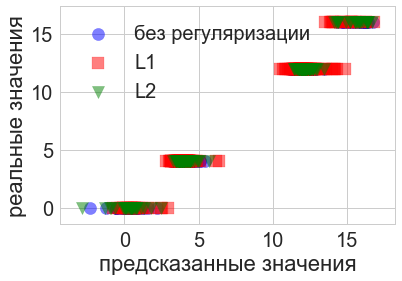


P: 
Test train-test split:  Counter({30.0: 108, 52.0: 90, 20.0: 34, 16.0: 25, 40.0: 15}) Counter({30.0: 86, 52.0: 72, 20.0: 27, 16.0: 20, 40.0: 12}) Counter({30.0: 22, 52.0: 18, 20.0: 7, 16.0: 5, 40.0: 3})
	Linear: 
  Features importance raw: 
        feature name  importance
15     counters_size   65.151274
16      counters_num   34.840596
13      Gauss.int_Mn    0.002444
10      Gauss.int_Mo    0.001405
1       Gauss.int_Ti    0.001081
11      Gauss.int_Sr    0.000919
5       Gauss.int_Ta    0.000449
4       Gauss.int_Si    0.000416
6       Gauss.int_Zn    0.000404
3        Gauss.int_P    0.000251
2   Gauss.int_Mo_Coh    0.000230
8        Gauss.int_S    0.000210
9        Gauss.int_K    0.000129
7       Gauss.int_Fe    0.000078
12      Gauss.int_Ca    0.000064
14      Gauss.int_Cl    0.000036
17         aver_gray    0.000009
0             base_s    0.000005
  Linear neg_mean_absolute_error mean: -1.11296656812, std: 0.107269469504, rel std: 0.107269469504
  Linear neg_mean_squared_er

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=18,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
  score:  0.968238233763
  parameters:  {'normalize': True, 'alpha': 0.0001, 'max_iter': 18, 'fit_intercept': True}
  Features importamce: 
	        feature name    importance
15     counters_size  7.772462e+01
16      counters_num  2.227176e+01
13      Gauss.int_Mn  8.968475e-04
10      Gauss.int_Mo  5.861385e-04
6       Gauss.int_Zn  5.812135e-04
11      Gauss.int_Sr  4.126059e-04
5       Gauss.int_Ta  3.960094e-04
8        Gauss.int_S  1.614416e-04
1       Gauss.int_Ti  1.334840e-04
14      Gauss.int_Cl  1.242606e-04
2   Gauss.int_Mo_Coh  8.277897e-05
4       Gauss.int_Si  6.641825e-05
7       Gauss.int_Fe  6.176630e-05
3        Gauss.int_P  5.457101e-05
17         aver_gray  3.320095e-05
12      Gauss.int_Ca  2.708549e-05
0             base_s  8.961258e-0

/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.95120948737e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.10012046523e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.08758547132e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal conditio

  Best with grid search: 
  estimator:  Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=16,
   normalize=True, random_state=None, solver='lsqr', tol=0.001)
  score:  0.979058145113
  parameters:  {'normalize': True, 'alpha': 0.0001, 'solver': 'lsqr', 'max_iter': 16, 'fit_intercept': True}
  Features importamce: 
	        feature name  importance
15     counters_size   65.358638
16      counters_num   34.633094
13      Gauss.int_Mn    0.002823
10      Gauss.int_Mo    0.001735
11      Gauss.int_Sr    0.000877
1       Gauss.int_Ti    0.000625
5       Gauss.int_Ta    0.000441
6       Gauss.int_Zn    0.000410
4       Gauss.int_Si    0.000381
2   Gauss.int_Mo_Coh    0.000277
3        Gauss.int_P    0.000213
8        Gauss.int_S    0.000202
9        Gauss.int_K    0.000125
12      Gauss.int_Ca    0.000057
7       Gauss.int_Fe    0.000047
14      Gauss.int_Cl    0.000036
17         aver_gray    0.000010
0             base_s    0.000005
  Best Ridge neg_mean_absolute_error mean: -

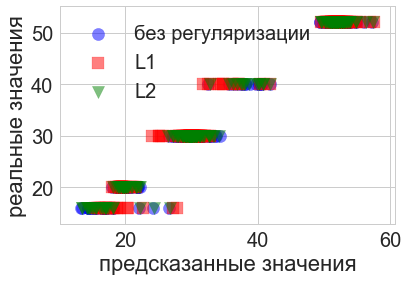


K: 
Test train-test split:  Counter({15.0: 108, 0.0: 105, 20.0: 34, 8.0: 25}) Counter({15.0: 86, 0.0: 84, 20.0: 27, 8.0: 20}) Counter({15.0: 22, 0.0: 21, 20.0: 7, 8.0: 5})
	Linear: 
  Features importance raw: 
        feature name  importance
15     counters_size   76.703241
16      counters_num   23.284662
10      Gauss.int_Mo    0.005640
13      Gauss.int_Mn    0.002899
1       Gauss.int_Ti    0.001397
5       Gauss.int_Ta    0.000536
3        Gauss.int_P    0.000259
4       Gauss.int_Si    0.000237
2   Gauss.int_Mo_Coh    0.000209
12      Gauss.int_Ca    0.000151
11      Gauss.int_Sr    0.000151
7       Gauss.int_Fe    0.000134
9        Gauss.int_K    0.000128
14      Gauss.int_Cl    0.000117
6       Gauss.int_Zn    0.000090
8        Gauss.int_S    0.000073
17         aver_gray    0.000058
0             base_s    0.000020
  Linear neg_mean_absolute_error mean: -0.286085033029, std: 0.0323826428902, rel std: 0.0323826428902
  Linear neg_mean_squared_error mean: -0.195309573352, std:

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=18,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
  score:  0.994075590028
  parameters:  {'normalize': False, 'alpha': 2.0, 'max_iter': 18, 'fit_intercept': True}
  Features importamce: 
	        feature name  importance
10      Gauss.int_Mo   55.762343
13      Gauss.int_Mn   13.162853
1       Gauss.int_Ti   10.753191
2   Gauss.int_Mo_Coh    7.458849
4       Gauss.int_Si    5.297676
11      Gauss.int_Sr    3.187621
17         aver_gray    0.827517
5       Gauss.int_Ta    0.746550
3        Gauss.int_P    0.739295
14      Gauss.int_Cl    0.531338
8        Gauss.int_S    0.442638
12      Gauss.int_Ca    0.438267
9        Gauss.int_K    0.308354
0             base_s    0.216279
7       Gauss.int_Fe    0.127230
6       Gauss.int_Zn    0.000000
15     counters_size    0.000000
16      counters_num    0.000000
  Bes

/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.16153365202e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.20360556814e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.12134067274e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal conditio

  Best with grid search: 
  estimator:  Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=16,
   normalize=True, random_state=None, solver='lsqr', tol=0.001)
  score:  0.996359658924
  parameters:  {'normalize': True, 'alpha': 0.0001, 'solver': 'lsqr', 'max_iter': 16, 'fit_intercept': True}
  Features importamce: 
	        feature name  importance
15     counters_size   77.312453
16      counters_num   22.675824
10      Gauss.int_Mo    0.005507
13      Gauss.int_Mn    0.003364
1       Gauss.int_Ti    0.000889
5       Gauss.int_Ta    0.000540
4       Gauss.int_Si    0.000284
3        Gauss.int_P    0.000231
12      Gauss.int_Ca    0.000145
2   Gauss.int_Mo_Coh    0.000138
9        Gauss.int_K    0.000129
11      Gauss.int_Sr    0.000118
14      Gauss.int_Cl    0.000113
6       Gauss.int_Zn    0.000083
17         aver_gray    0.000063
8        Gauss.int_S    0.000053
7       Gauss.int_Fe    0.000044
0             base_s    0.000019
  Best Ridge neg_mean_absolute_error mean: -

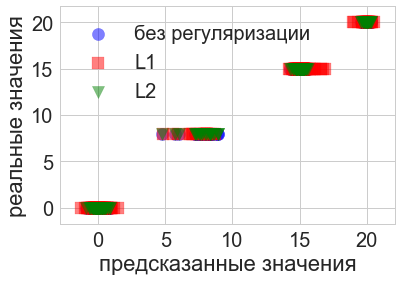


S: 
Test train-test split:  Counter({0.0: 115, 15.0: 108, 20.0: 34, 10.0: 15}) Counter({0.0: 92, 15.0: 86, 20.0: 27, 10.0: 12}) Counter({0.0: 23, 15.0: 22, 20.0: 7, 10.0: 3})
	Linear: 
  Features importance raw: 
        feature name  importance
15     counters_size   72.818509
16      counters_num   27.129684
10      Gauss.int_Mo    0.017044
1       Gauss.int_Ti    0.010836
4       Gauss.int_Si    0.008978
13      Gauss.int_Mn    0.005302
11      Gauss.int_Sr    0.002599
2   Gauss.int_Mo_Coh    0.001844
5       Gauss.int_Ta    0.000991
9        Gauss.int_K    0.000909
12      Gauss.int_Ca    0.000789
6       Gauss.int_Zn    0.000663
8        Gauss.int_S    0.000627
7       Gauss.int_Fe    0.000431
17         aver_gray    0.000326
3        Gauss.int_P    0.000260
14      Gauss.int_Cl    0.000160
0             base_s    0.000048
  Linear neg_mean_absolute_error mean: -0.696858103386, std: 0.0647292686371, rel std: 0.0647292686371
  Linear neg_mean_squared_error mean: -1.10279609194, st

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:80: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


  Best with grid search: 
  estimator:  Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=18,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
  score:  0.959244219853
  parameters:  {'normalize': False, 'alpha': 2.0, 'max_iter': 18, 'fit_intercept': True}
  Features importamce: 
	        feature name  importance
13      Gauss.int_Mn   22.184810
1       Gauss.int_Ti   16.939109
10      Gauss.int_Mo   16.861514
4       Gauss.int_Si   16.133294
2   Gauss.int_Mo_Coh   13.843450
11      Gauss.int_Sr    6.402177
6       Gauss.int_Zn    2.467533
17         aver_gray    1.443607
14      Gauss.int_Cl    1.374517
8        Gauss.int_S    0.872781
5       Gauss.int_Ta    0.746430
3        Gauss.int_P    0.322342
9        Gauss.int_K    0.128315
7       Gauss.int_Fe    0.127101
12      Gauss.int_Ca    0.090016
0             base_s    0.063002
15     counters_size    0.000000
16      counters_num    0.000000
  Bes

/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.12349845918e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.12656245354e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.95551848355e-18 / 1.11022302463e-16
  RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal conditio

  Best with grid search: 
  estimator:  Ridge(alpha=0.2223111111111111, copy_X=True, fit_intercept=False, max_iter=2,
   normalize=True, random_state=None, solver='svd', tol=0.001)
  score:  0.987181328122
  parameters:  {'normalize': True, 'alpha': 0.2223111111111111, 'solver': 'svd', 'max_iter': 2, 'fit_intercept': False}
  Features importamce: 
	        feature name  importance
16      counters_num   29.551475
10      Gauss.int_Mo   20.594981
1       Gauss.int_Ti   13.313984
4       Gauss.int_Si   10.139685
15     counters_size    9.371487
13      Gauss.int_Mn    5.938234
11      Gauss.int_Sr    2.886914
2   Gauss.int_Mo_Coh    2.574145
5       Gauss.int_Ta    1.244627
9        Gauss.int_K    1.008951
12      Gauss.int_Ca    0.965703
6       Gauss.int_Zn    0.683588
8        Gauss.int_S    0.514020
17         aver_gray    0.417207
7       Gauss.int_Fe    0.407418
14      Gauss.int_Cl    0.253815
3        Gauss.int_P    0.074958
0             base_s    0.058808
  Best Ridge neg_mean_

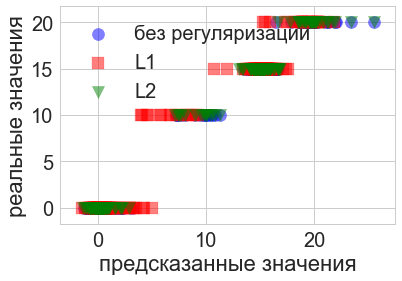



	 Start data calculate all_df_r

N: 
Test train-test split:  Counter({4.0: 108, 12.0: 105, 0.0: 34, 16.0: 25}) Counter({4.0: 86, 12.0: 84, 0.0: 27, 16.0: 20}) Counter({4.0: 22, 12.0: 21, 0.0: 7, 16.0: 5})
	Linear: 
  Features importance raw: 
        feature name  importance
9        Gauss.int_K   20.007444
12      Gauss.int_Ca   15.379682
11      Gauss.int_Sr   15.359680
8        Gauss.int_S   10.976847
1       Gauss.int_Ti    8.263176
4       Gauss.int_Si    5.430383
0             base_s    5.303806
14      Gauss.int_Cl    5.044029
3        Gauss.int_P    4.641664
17         aver_gray    2.353816
7       Gauss.int_Fe    2.076871
2   Gauss.int_Mo_Coh    1.894584
10      Gauss.int_Mo    1.571243
16      counters_num    0.525574
15     counters_size    0.422735
13      Gauss.int_Mn    0.361269
6       Gauss.int_Zn    0.197750
5       Gauss.int_Ta    0.189448
  Linear neg_mean_absolute_error mean: -0.363014115361, std: 0.0307340316403, rel std: 0.0307340316403
  Linear neg_mean_squared

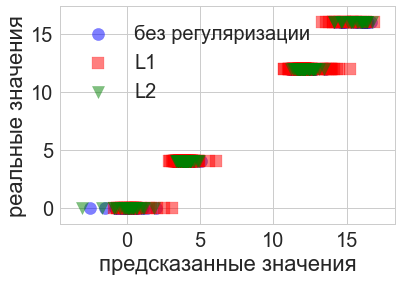


P: 
Test train-test split:  Counter({30.0: 108, 52.0: 90, 20.0: 34, 16.0: 25, 40.0: 15}) Counter({30.0: 86, 52.0: 72, 20.0: 27, 16.0: 20, 40.0: 12}) Counter({30.0: 22, 52.0: 18, 20.0: 7, 16.0: 5, 40.0: 3})
	Linear: 
  Features importance raw: 
        feature name  importance
11      Gauss.int_Sr   17.900389
9        Gauss.int_K   13.688799
0             base_s   13.617787
3        Gauss.int_P   13.254790
8        Gauss.int_S   11.734169
13      Gauss.int_Mn    7.035599
12      Gauss.int_Ca    4.922949
1       Gauss.int_Ti    4.718842
14      Gauss.int_Cl    4.363896
2   Gauss.int_Mo_Coh    2.195504
4       Gauss.int_Si    1.979666
16      counters_num    1.503312
7       Gauss.int_Fe    1.101801
15     counters_size    0.914835
5       Gauss.int_Ta    0.761955
17         aver_gray    0.179890
6       Gauss.int_Zn    0.124395
10      Gauss.int_Mo    0.001423
  Linear neg_mean_absolute_error mean: -1.11296656812, std: 0.107269469504, rel std: 0.107269469504
  Linear neg_mean_squared_er

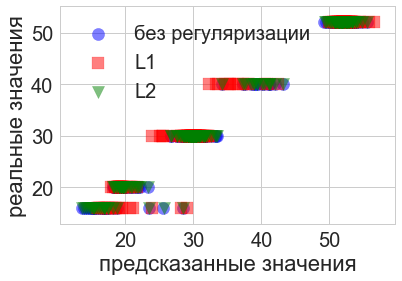


K: 
Test train-test split:  Counter({15.0: 108, 0.0: 105, 20.0: 34, 8.0: 25}) Counter({15.0: 86, 0.0: 84, 20.0: 27, 8.0: 20}) Counter({15.0: 22, 0.0: 21, 20.0: 7, 8.0: 5})
	Linear: 
  Features importance raw: 
        feature name  importance
0             base_s   23.938532
12      Gauss.int_Ca   12.099845
9        Gauss.int_K   12.078845
3        Gauss.int_P   10.713959
10      Gauss.int_Mo    7.843259
1       Gauss.int_Ti    7.429413
13      Gauss.int_Mn    6.445860
14      Gauss.int_Cl    3.926634
11      Gauss.int_Sr    3.362275
8        Gauss.int_S    2.361601
2   Gauss.int_Mo_Coh    2.299858
7       Gauss.int_Fe    1.962911
4       Gauss.int_Si    1.303805
15     counters_size    1.288636
16      counters_num    1.158800
17         aver_gray    0.832369
6       Gauss.int_Zn    0.621487
5       Gauss.int_Ta    0.331912
  Linear neg_mean_absolute_error mean: -0.28608503303, std: 0.0323826428902, rel std: 0.0323826428902
  Linear neg_mean_squared_error mean: -0.195309573352, std: 

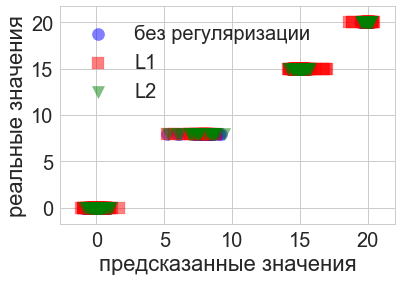


S: 
Test train-test split:  Counter({0.0: 115, 15.0: 108, 20.0: 34, 10.0: 15}) Counter({0.0: 92, 15.0: 86, 20.0: 27, 10.0: 12}) Counter({0.0: 23, 15.0: 22, 20.0: 7, 10.0: 3})
	Linear: 
  Features importance raw: 
        feature name  importance
9        Gauss.int_K   20.095111
0             base_s   15.261511
12      Gauss.int_Ca   10.938158
11      Gauss.int_Sr   10.640277
1       Gauss.int_Ti   10.132174
10      Gauss.int_Mo    7.177262
8        Gauss.int_S    6.993931
14      Gauss.int_Cl    5.260576
3        Gauss.int_P    3.926710
4       Gauss.int_Si    3.090323
2   Gauss.int_Mo_Coh    2.684621
17         aver_gray    2.116995
13      Gauss.int_Mn    0.732186
6       Gauss.int_Zn    0.499584
7       Gauss.int_Fe    0.169174
16      counters_num    0.115717
15     counters_size    0.101051
5       Gauss.int_Ta    0.064638
  Linear neg_mean_absolute_error mean: -0.696858103386, std: 0.0647292686371, rel std: 0.0647292686371
  Linear neg_mean_squared_error mean: -1.10279609194, st

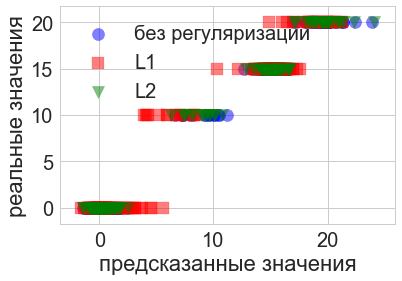



	 Start data calculate all_df_z

N: 
Test train-test split:  Counter({4.0: 108, 12.0: 105, 0.0: 34, 16.0: 25}) Counter({4.0: 86, 12.0: 84, 0.0: 27, 16.0: 20}) Counter({4.0: 22, 12.0: 21, 0.0: 7, 16.0: 5})
	Linear: 
  Features importance raw: 
        feature name  importance
12      Gauss.int_Ca   22.223218
9        Gauss.int_K   20.885534
11      Gauss.int_Sr   14.108133
1       Gauss.int_Ti    8.346262
7       Gauss.int_Fe    7.308042
13      Gauss.int_Mn    6.124518
4       Gauss.int_Si    5.592498
8        Gauss.int_S    4.126251
0             base_s    3.258658
2   Gauss.int_Mo_Coh    1.862866
17         aver_gray    1.720751
14      Gauss.int_Cl    1.697427
3        Gauss.int_P    1.481256
10      Gauss.int_Mo    0.845845
16      counters_num    0.253580
15     counters_size    0.059197
6       Gauss.int_Zn    0.058598
5       Gauss.int_Ta    0.047367
  Linear neg_mean_absolute_error mean: -0.363014115361, std: 0.0307340316403, rel std: 0.0307340316403
  Linear neg_mean_squared

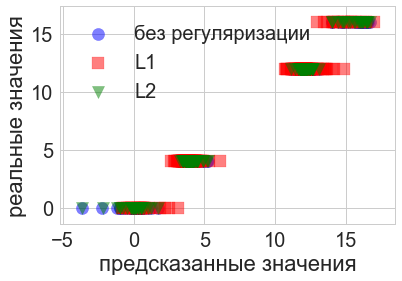


P: 
Test train-test split:  Counter({30.0: 108, 52.0: 90, 20.0: 34, 16.0: 25, 40.0: 15}) Counter({30.0: 86, 52.0: 72, 20.0: 27, 16.0: 20, 40.0: 12}) Counter({30.0: 22, 52.0: 18, 20.0: 7, 16.0: 5, 40.0: 3})
	Linear: 
  Features importance raw: 
        feature name  importance
11      Gauss.int_Sr   21.786542
9        Gauss.int_K   19.768591
3        Gauss.int_P   16.071897
13      Gauss.int_Mn   10.917738
8        Gauss.int_S    6.908081
0             base_s    6.621432
1       Gauss.int_Ti    4.296308
12      Gauss.int_Ca    3.011308
14      Gauss.int_Cl    2.994035
7       Gauss.int_Fe    2.098973
2   Gauss.int_Mo_Coh    1.524993
16      counters_num    1.115246
4       Gauss.int_Si    0.987447
10      Gauss.int_Mo    0.625562
15     counters_size    0.457585
5       Gauss.int_Ta    0.408093
6       Gauss.int_Zn    0.306481
17         aver_gray    0.099688
  Linear neg_mean_absolute_error mean: -1.11296656812, std: 0.107269469504, rel std: 0.107269469504
  Linear neg_mean_squared_er

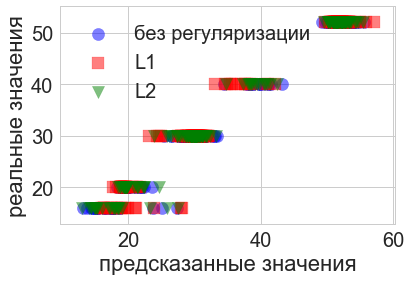


K: 
Test train-test split:  Counter({15.0: 108, 0.0: 105, 20.0: 34, 8.0: 25}) Counter({15.0: 86, 0.0: 84, 20.0: 27, 8.0: 20}) Counter({15.0: 22, 0.0: 21, 20.0: 7, 8.0: 5})
	Linear: 
  Features importance raw: 
        feature name  importance
0             base_s   20.432006
9        Gauss.int_K   16.128010
3        Gauss.int_P   12.921897
12      Gauss.int_Ca   10.921989
10      Gauss.int_Mo    7.361935
13      Gauss.int_Mn    7.245684
1       Gauss.int_Ti    6.768376
14      Gauss.int_Cl    4.626104
8        Gauss.int_S    3.238048
7       Gauss.int_Fe    3.190013
11      Gauss.int_Sr    2.539113
4       Gauss.int_Si    1.179182
2   Gauss.int_Mo_Coh    1.079190
16      counters_num    0.790164
17         aver_gray    0.620592
5       Gauss.int_Ta    0.461361
15     counters_size    0.397582
6       Gauss.int_Zn    0.098754
  Linear neg_mean_absolute_error mean: -0.28608503303, std: 0.0323826428902, rel std: 0.0323826428902
  Linear neg_mean_squared_error mean: -0.195309573352, std: 

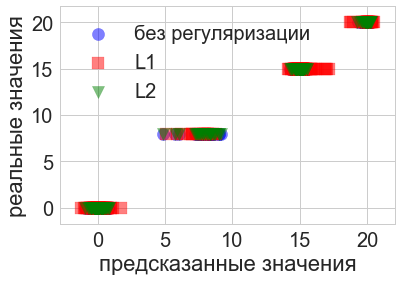


S: 
Test train-test split:  Counter({0.0: 115, 15.0: 108, 20.0: 34, 10.0: 15}) Counter({0.0: 92, 15.0: 86, 20.0: 27, 10.0: 12}) Counter({0.0: 23, 15.0: 22, 20.0: 7, 10.0: 3})
	Linear: 
  Features importance raw: 
        feature name  importance
9        Gauss.int_K   24.125352
1       Gauss.int_Ti   15.443272
11      Gauss.int_Sr   12.081399
0             base_s   10.992349
12      Gauss.int_Ca   10.298408
8        Gauss.int_S    5.661506
14      Gauss.int_Cl    5.093444
10      Gauss.int_Mo    4.573920
3        Gauss.int_P    3.809477
4       Gauss.int_Si    2.370544
17         aver_gray    1.910095
7       Gauss.int_Fe    1.380907
2   Gauss.int_Mo_Coh    1.118293
13      Gauss.int_Mn    0.458339
6       Gauss.int_Zn    0.432140
15     counters_size    0.114372
5       Gauss.int_Ta    0.073422
16      counters_num    0.062762
  Linear neg_mean_absolute_error mean: -0.696858103386, std: 0.0647292686371, rel std: 0.0647292686371
  Linear neg_mean_squared_error mean: -1.10279609194, st

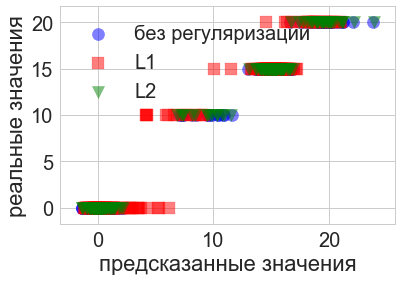

In [25]:
n = ['all_df', 'all_df_r', 'all_df_z']
n_counter = 0
for all_df_class in [all_df, all_df_norm_r, all_df_norm_z]:
    print
    print '\t Start data calculate ' + n[n_counter]
    print
    all_df_class.replace('no', 0, inplace=True)
    all_df_class.dropna(inplace=True)

    print 'N: '
    all_df_class_type = all_df_class.loc[:,[
            u'N_mark', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    all_df_class_type_data = all_df_class_type.ix[:, all_df_class_type.columns != 'N_mark']
    all_df_class_type_data = all_df_class_type_data.astype(float, inplace=True)

    all_df_class_type_labels = all_df_class_type.N_mark
    all_df_class_type_labels = all_df_class_type_labels.astype(float, inplace=True)
    regr(all_df_class_type_data, all_df_class_type_labels, 'N_range_all_'+n[n_counter])
    print

    print 'P: '
    all_df_class_type = all_df_class.loc[:,[
            u'P_mark', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    all_df_class_type_data = all_df_class_type.ix[:, all_df_class_type.columns != 'P_mark']
    all_df_class_type_data = all_df_class_type_data.astype(float, inplace=True)
    all_df_class_type_labels = all_df_class_type.P_mark
    all_df_class_type_labels = all_df_class_type_labels.astype(float, inplace=True)
    regr(all_df_class_type_data,all_df_class_type_labels,'P_range_all_'+n[n_counter])
    print


    print 'K: '
    all_df_class_type = all_df_class.loc[:,[
            u'K_mark', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    all_df_class_type_data = all_df_class_type.ix[:, all_df_class_type.columns != 'K_mark']
    all_df_class_type_data = all_df_class_type_data.astype(float, inplace=True)
    all_df_class_type_labels = all_df_class_type.K_mark
    all_df_class_type_labels = all_df_class_type_labels.astype(float, inplace=True)
    regr(all_df_class_type_data,all_df_class_type_labels, 'K_range_all_'+n[n_counter])
    print


    print 'S: '
    all_df_class_type = all_df_class.loc[:,[
            u'S_mark', u'base_s',
            u'Gauss.int_Ti', u'Gauss.int_Mo_Coh', u'Gauss.int_P',
            u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn', 
            u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K',
            u'Gauss.int_Mo', u'Gauss.int_Sr', u'Gauss.int_Ca', 
            u'Gauss.int_Mn', u'Gauss.int_Cl', u'counters_size', 
            u'counters_num', u'aver_gray'
        ]]

    all_df_class_type_data = all_df_class_type.ix[
        :, all_df_class_type.columns != 'S_mark'
    ]
    all_df_class_type_data = all_df_class_type_data.astype(float, inplace=True)
    all_df_class_type_labels = all_df_class_type.S_mark
    all_df_class_type_labels = all_df_class_type_labels.astype(float, inplace=True)
    regr(all_df_class_type_data, all_df_class_type_labels, 'S_range_all_'+n[n_counter])
    n_counter += 1
    print

# Reduce dimentional and visualisation

In [12]:
df_calc = all_df[[
        u'mark', u'base_s', u'base_max_int',
        u'Gauss.int_Ti', u'Gauss.int_Mo_Coh',
        u'Gauss.int_P', u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn',
        u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K', u'Gauss.int_Mo',
        u'Gauss.int_Sr', u'Gauss.int_Ca', u'Gauss.int_Mn', u'Gauss.int_Cl',
        u'aver_gray', u'counters_num', u'counters_size'
    ]]
num_data = df_calc.ix[:, df_calc.columns != 'mark']
# normalisation without std
data_norm = (num_data - num_data.mean()) / (num_data.max()-num_data.min())

labels = df_calc['mark']
# normalisation with std (Z-conversation)
data_norm2 = (num_data - num_data.mean()) / (num_data.std())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [14]:
# Random Proection
names = ['data_norm1', 'data_norm2']
datas = [data_norm, data_norm2]
for ind in xrange(len(datas)):
    X_raw = datas[ind]
    feature_names = labels
    transformer = random_projection.SparseRandomProjection(n_components = 2, random_state = 12)
    X_2d = transformer.fit_transform(X_raw)
    X_2d_norm = (X_2d - X_2d.mean()) / (X_2d.max() - X_2d.min())
    if ind == 1:
        X_2d_norm = (X_2d - X_2d.mean()) / X_2d.std()
    # do clustering
    estimator = KMeans(n_clusters=len(Counter(labels)), init='k-means++', n_init=10)
    estimator.fit(X_2d_norm)

    labels_t = estimator.labels_

    print names[ind]
    ftype_name = Counter(labels).keys()
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    print shifr
    labels_class = np.array([shifr[x] for x in labels], dtype=int)
    classifier = KNeighborsClassifier()
    x, x_test, y, y_test = cross_validation.train_test_split(X_2d_norm, labels_class,
                                                             test_size=0.2, train_size=0.8)
    classifier.fit(x, y)
    for score in ['accuracy', 'precision_weighted', 'f1_weighted']:
            ridge_scoring = cross_validation.cross_val_score(classifier, x_test, y_test, scoring = score, 
                                                              cv = 10)
            print score + ' mean: {}, std: {}, rel std: {}'.format(ridge_scoring.mean(), 
                                                                   ridge_scoring.std(), 
                                                                   ridge_scoring.std())

    
    
    label_color = [colors[l] for l in labels_t]

    fig, ax = plt.subplots()
    ax.scatter(X_2d_norm[:,0], X_2d_norm[:,1], c=label_color, s=50)
    ax.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], marker='*', s=150, c='g')
    
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    inv_shifr = {v: k for k, v in shifr.iteritems()}
    
    shifr2 = {
        '12.52': u'NP\n12-52', 
        '12.40.10': 'NP(S)\n12-40(10)', 
        '0.20.20.5': 'NPK(S)\n0-20-20(5)', 
        '4.30.15.16': 'NPK(S)\n4-30-15(16)', 
        '16.16.8': 'NPK\n16-16-8'
    }
    
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    
    _ = Counter(labels_t).keys()
    for ind2 in xrange(len(_)):
        k = _[ind2]
        x = X_2d_norm[:,1]
        y = X_2d_norm[:,0]
        plt.text(
            y[labels_t==k].mean(),
            x[labels_t==k].mean(), 
            shifr2[str(inv_shifr[k])],
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
            **title_font
        )

    plt.draw()
    plt.savefig(names[ind] + '_Random.png', dpi=300)
    plt.show()

data_norm1
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.954166666667, std: 0.0708333333333, rel std: 0.0708333333333
precision_weighted mean: 0.945138888889, std: 0.0944265710212, rel std: 0.0944265710212
f1_weighted mean: 0.943333333333, std: 0.0882546819658, rel std: 0.0882546819658


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NameError: name 'colors' is not defined

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


data_norm1
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.949206349206, std: 0.102574567755, rel std: 0.102574567755
precision_weighted mean: 0.913492063492, std: 0.1741136717, rel std: 0.1741136717
f1_weighted mean: 0.928253968254, std: 0.144674158871, rel std: 0.144674158871


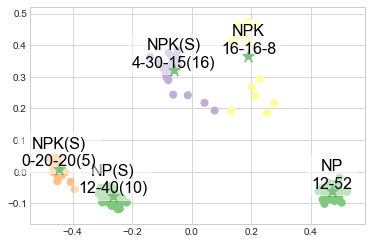

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:553: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


data_norm2
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.948214285714, std: 0.0636125468948, rel std: 0.0636125468948
precision_weighted mean: 0.926339285714, std: 0.0918222290486, rel std: 0.0918222290486
f1_weighted mean: 0.934523809524, std: 0.0806102715106, rel std: 0.0806102715106


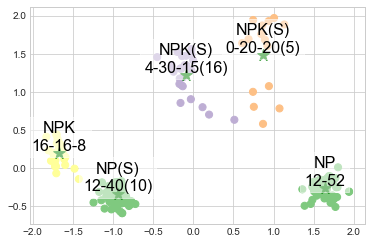

In [16]:
# Randomized PCA
names = ['data_norm1', 'data_norm2']
datas = [data_norm, data_norm2]
for ind in xrange(len(datas)):
    X_raw = datas[ind]
    feature_names = labels
    transformer = RandomizedPCA(n_components=2)
    X_2d = transformer.fit_transform(X_raw)
    X_2d_norm = (X_2d - X_2d.mean()) / (X_2d.max() - X_2d.min())
    if ind == 1:
        X_2d_norm = (X_2d - X_2d.mean()) / X_2d.std()
    # do clustering
    estimator = KMeans(n_clusters=len(Counter(labels)), init='k-means++', n_init=10)
    estimator.fit(X_2d_norm)

    labels_t = estimator.labels_

    print names[ind]
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    labels_class = np.array([shifr[x] for x in labels], dtype=int)
    classifier = KNeighborsClassifier()
    print shifr
    x, x_test, y, y_test = cross_validation.train_test_split(X_2d_norm, labels_class,
                                                             test_size=0.2, train_size=0.8)
    classifier.fit(x, y)
    for score in ['accuracy', 'precision_weighted', 'f1_weighted']:
            ridge_scoring = cross_validation.cross_val_score(classifier, x_test, y_test, scoring = score, 
                                                              cv = 10)
            print score + ' mean: {}, std: {}, rel std: {}'.format(ridge_scoring.mean(), 
                                                                   ridge_scoring.std(), 
                                                                   ridge_scoring.std())

    
    
    label_color = [colors[l] for l in labels_t]

    shifr2 = {
        '12.52': u'NP\n12-52',  # МАФ
        '12.40.10': 'NP(S)\n12-40(10)', 
        '0.20.20.5': 'NPK(S)\n0-20-20(5)', 
        '4.30.15.16': 'NPK(S)\n4-30-15(16)', 
        '16.16.8': 'NPK\n16-16-8'
    }
    
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    
    fig, ax = plt.subplots()
    ax.scatter(X_2d_norm[:,0], X_2d_norm[:,1], c=label_color, s=50)
    ax.scatter(estimator.cluster_centers_[:,0], estimator.cluster_centers_[:,1], marker='*', s=150, c='g')
    
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    inv_shifr = {v: k for k, v in shifr.iteritems()}

    for k in Counter(labels_t).keys():
        x = X_2d_norm[:,1]
        y = X_2d_norm[:,0]
        plt.text(
            y[labels_t==k].mean(),
            x[labels_t==k].mean(), 
            shifr2[str(inv_shifr[k])],
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
        **title_font
        )

    plt.draw()
    plt.savefig(names[ind] + '_RandomizePCA.png', dpi=300)
    plt.show()

Varience after PCA:  [ 0.74820602  0.12577576]
data_norm1
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.9625, std: 0.0572821961869, rel std: 0.0572821961869
precision_weighted mean: 0.940625, std: 0.0910550142771, rel std: 0.0910550142771
f1_weighted mean: 0.94880952381, std: 0.0782551353788, rel std: 0.0782551353788


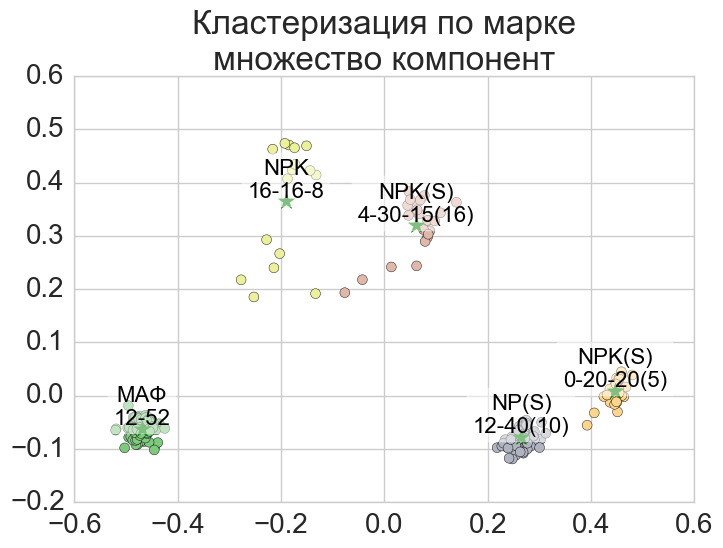

Varience after PCA:  [ 0.65471081  0.14236087]
data_norm2
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.925, std: 0.114564392374, rel std: 0.114564392374
precision_weighted mean: 0.876041666667, std: 0.189425873255, rel std: 0.189425873255
f1_weighted mean: 0.895595238095, std: 0.159495422137, rel std: 0.159495422137


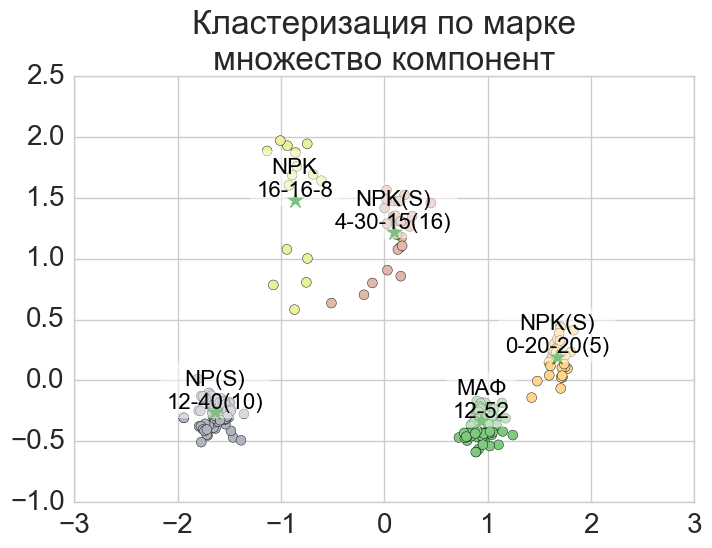

In [75]:
# PCA
names = ['data_norm1', 'data_norm2']
datas = [data_norm, data_norm2]

for ind in xrange(len(datas)):
    x_raw = datas[ind]
    num_clusters = len(Counter(labels))
    pca=PCA(n_components=2)
    X_2d = pca.fit_transform(x_raw)
    
    X_2d_norm = (X_2d - X_2d.mean()) / (X_2d.max() - X_2d.min())
    if ind == 1:
        X_2d_norm = (X_2d - X_2d.mean()) / X_2d.std()
        
    # Check the resulting varience
    var = pca.explained_variance_ratio_
    print "Varience after PCA: ",var

    km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
    km.fit_transform(X_2d_norm)
    labels_t = km.labels_

    centers2D = km.cluster_centers_

    print names[ind]
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    labels_class = np.array([shifr[x] for x in labels], dtype=int)
    classifier = KNeighborsClassifier()
    print shifr
    x, x_test, y, y_test = cross_validation.train_test_split(X_2d_norm, labels_class,
                                                             test_size=0.2, train_size=0.8)
    classifier.fit(x, y)
    for score in ['accuracy', 'precision_weighted', 'f1_weighted']:
            ridge_scoring = cross_validation.cross_val_score(classifier, x_test, y_test, scoring = score, 
                                                              cv = 10)
            print score + ' mean: {}, std: {}, rel std: {}'.format(ridge_scoring.mean(), 
                                                                   ridge_scoring.std(), 
                                                                   ridge_scoring.std())

    label_color = [colors[l] for l in labels_t]
    
    shifr2 = {
        '12.52': u'NP\n12-52', 
        '12.40.10': 'NP(S)\n12-40(10)', 
        '0.20.20.5': 'NPK(S)\n0-20-20(5)', 
        '4.30.15.16': 'NPK(S)\n4-30-15(16)', 
        '16.16.8': 'NPK\n16-16-8'
    }
    
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

    plt.scatter(X_2d_norm[:,0], X_2d_norm[:,1], c=label_color, s=50)
    plt.hold(True)
    plt.scatter(centers2D[:,0], centers2D[:,1],marker='*',s=150.0,color='green')
    
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    inv_shifr = {v: k for k, v in shifr.iteritems()}

    for k in Counter(labels_t).keys():
        x = X_2d_norm[:,1]
        y = X_2d_norm[:,0]
        plt.text(
            y[labels_t==k].mean(),
            x[labels_t==k].mean(), 
            shifr2[str(inv_shifr[k])],
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
            **title_font
        )

    plt.draw()
    plt.savefig(names[ind] + '_PCA.png', dpi=300)
    plt.show()

data_norm1
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.958928571429, std: 0.0629068391207, rel std: 0.0629068391207
precision_weighted mean: 0.936011904762, std: 0.0983967460989, rel std: 0.0983967460989
f1_weighted mean: 0.944285714286, std: 0.0854506527708, rel std: 0.0854506527708


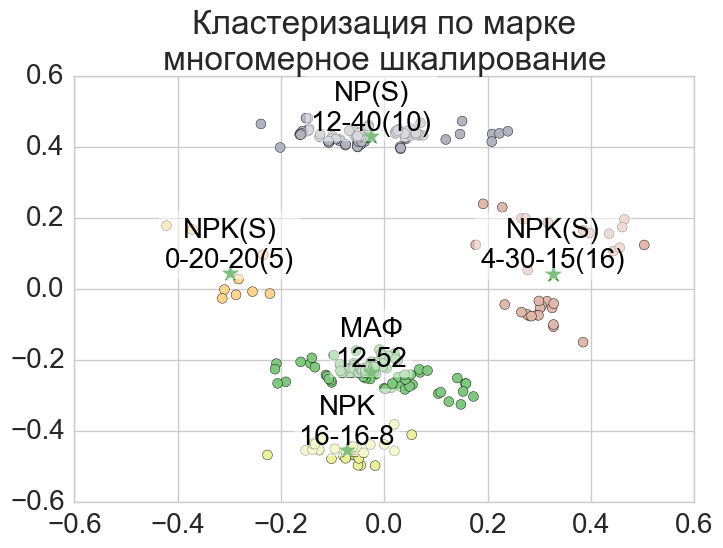

data_norm2
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.942857142857, std: 0.0699854212224, rel std: 0.0699854212224
precision_weighted mean: 0.907142857143, std: 0.11391308299, rel std: 0.11391308299
f1_weighted mean: 0.920952380952, std: 0.0968482928953, rel std: 0.0968482928953


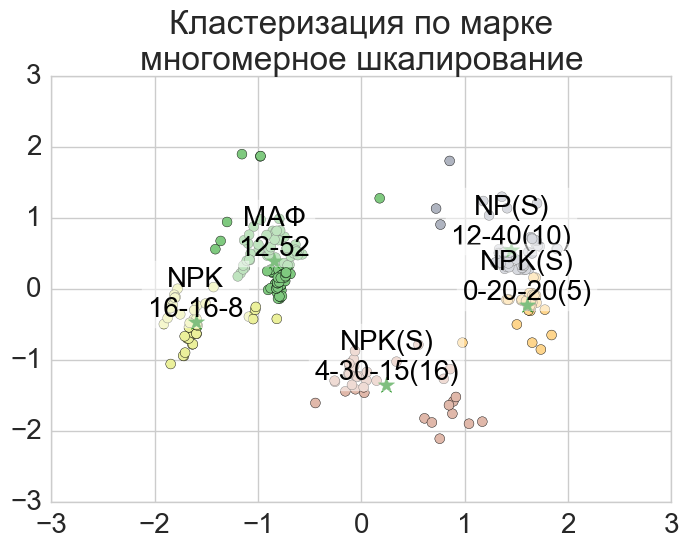

In [77]:
# Nonlinear MDS
names = ['data_norm1', 'data_norm2']
datas = [data_norm, data_norm2]

for ind in xrange(len(datas)):
    x_raw = datas[ind]
    num_clusters = len(Counter(labels))
    mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
    X_2d = mds.fit_transform(x_raw)
    
    X_2d_norm = (X_2d - X_2d.mean()) / (X_2d.max() - X_2d.min())
    if ind == 1:
        X_2d_norm = (X_2d - X_2d.mean()) / X_2d.std()
        
    km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
    km.fit_transform(X_2d_norm)
    labels_t = km.labels_

    print names[ind]
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    labels_class = np.array([shifr[x] for x in labels], dtype=int)
    classifier = KNeighborsClassifier()
    print shifr
    x, x_test, y, y_test = cross_validation.train_test_split(X_2d_norm, labels_class,
                                                             test_size=0.2, train_size=0.8)
    classifier.fit(x, y)
    for score in ['accuracy', 'precision_weighted', 'f1_weighted']:
            ridge_scoring = cross_validation.cross_val_score(classifier, x_test, y_test, scoring = score, 
                                                              cv = 10)
            print score + ' mean: {}, std: {}, rel std: {}'.format(ridge_scoring.mean(), 
                                                                   ridge_scoring.std(), 
                                                                   ridge_scoring.std())

    centers2D = km.cluster_centers_

    label_color = [colors[l] for l in labels_t]

    plt.title(u"Кластеризация по марке\nмногомерное шкалирование")
    plt.scatter(X_2d_norm[:,0], X_2d_norm[:,1], c=label_color, s=50)
    plt.hold(True)
    plt.scatter(centers2D[:,0], centers2D[:,1],marker='*',s=150.0,color='green')
    
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    inv_shifr = {v: k for k, v in shifr.iteritems()}
    
    shifr2 = {
        '12.52': u'NP\n12-52', 
        '12.40.10': 'NP(S)\n12-40(10)', 
        '0.20.20.5': 'NPK(S)\n0-20-20(5)', 
        '4.30.15.16': 'NPK(S)\n4-30-15(16)', 
        '16.16.8': 'NPK\n16-16-8'
    }
    
    title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

    for k in Counter(labels_t).keys():
        x = X_2d_norm[:,1]
        y = X_2d_norm[:,0]
        plt.text(
            y[labels_t==k].mean(),
            x[labels_t==k].mean(), 
            shifr2[str(inv_shifr[k])],
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
            **title_font
        )

    plt.draw()
    plt.savefig(names[ind] + '_MDS.png', dpi=300)
    plt.show()

data_norm1
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.834761904762, std: 0.125548456645, rel std: 0.125548456645
precision_weighted mean: 0.817529761905, std: 0.176648999666, rel std: 0.176648999666
f1_weighted mean: 0.808634920635, std: 0.153619920977, rel std: 0.153619920977


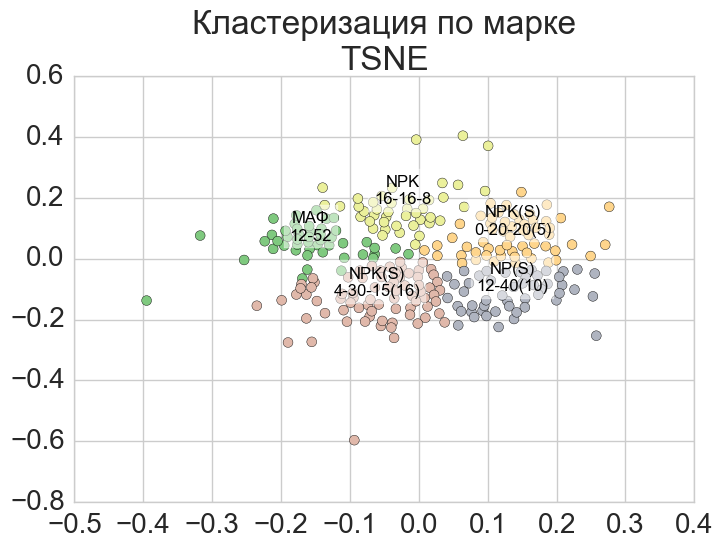

data_norm2
{'12.52': 0, '12.40.10': 1, '4.30.15.16': 2, '0.20.20.5': 3, '16.16.8': 4}
accuracy mean: 0.748214285714, std: 0.0692141874293, rel std: 0.0692141874293
precision_weighted mean: 0.727232142857, std: 0.152287473717, rel std: 0.152287473717
f1_weighted mean: 0.69869047619, std: 0.094673100888, rel std: 0.094673100888


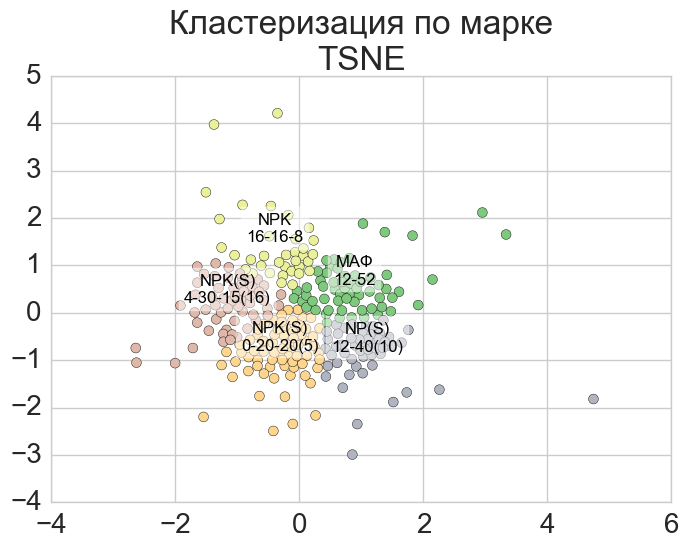

In [83]:
# Nonlinear TSNE
names = ['data_norm1', 'data_norm2']
datas = [data_norm, data_norm2]

for ind in xrange(len(datas)):
    x_raw = datas[ind]
    num_clusters = len(Counter(labels))
    tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
    X_2d = tsne.fit_transform(x_raw)
    
    X_2d_norm = (X_2d - X_2d.mean()) / (X_2d.max() - X_2d.min())
    if ind == 1:
        X_2d_norm = (X_2d - X_2d.mean()) / X_2d.std()
        
    
    print names[ind]
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    labels_class = np.array([shifr[x] for x in labels], dtype=int)
    classifier = KNeighborsClassifier()
    print shifr
    x, x_test, y, y_test = cross_validation.train_test_split(X_2d_norm, labels_class,
                                                             test_size=0.2, train_size=0.8)
    classifier.fit(x, y)
    for score in ['accuracy', 'precision_weighted', 'f1_weighted']:
            ridge_scoring = cross_validation.cross_val_score(classifier, x_test, y_test, scoring = score, 
                                                              cv = 10)
            print score + ' mean: {}, std: {}, rel std: {}'.format(ridge_scoring.mean(), 
                                                                   ridge_scoring.std(), 
                                                                   ridge_scoring.std())

    
    
    
    km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
    km.fit_transform(X_2d_norm)
    labels_t = km.labels_

    centers2D = km.cluster_centers_

    label_color = [colors[l] for l in labels_t]

    plt.scatter(X_2d_norm[:,0], X_2d_norm[:,1], c=label_color, s=50)
    plt.hold(True)
    
    shifr = dict(zip(ftype_name, xrange(len(labels))))
    inv_shifr = {v: k for k, v in shifr.iteritems()}
    
    shifr2 = {
        '12.52': u'NP\n12-52', 
        '12.40.10': 'NP(S)\n12-40(10)', 
        '0.20.20.5': 'NPK(S)\n0-20-20(5)', 
        '4.30.15.16': 'NPK(S)\n4-30-15(16)', 
        '16.16.8': 'NPK\n16-16-8'
    }
    
    title_font = {'fontname':'Arial', 'size':'12', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space

    for k in Counter(labels_t).keys():
        x = X_2d_norm[:,1]
        y = X_2d_norm[:,0]
        plt.text(
            y[labels_t==k].mean(),
            x[labels_t==k].mean(), 
            shifr2[str(inv_shifr[k])],
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
            **title_font
        )
    
    plt.draw()
    plt.savefig(names[ind] + '_TSNE.png', dpi=300)
    plt.show()

In [96]:
# MDS and PCA distance calculate
df_calc = all_df[[u'mark', u'base_s', u'base_max_int',
        u'Gauss.int_Ti', u'Gauss.int_Mo_Coh',
        u'Gauss.int_P', u'Gauss.int_Si', u'Gauss.int_Ta', u'Gauss.int_Zn',
        u'Gauss.int_Fe', u'Gauss.int_S', u'Gauss.int_K', u'Gauss.int_Mo',
        u'Gauss.int_Sr', u'Gauss.int_Ca', u'Gauss.int_Mn', u'Gauss.int_Cl',
        u'aver_gray', u'counters_num', u'counters_size'
    ]]
num_data = df_calc.ix[:, df_calc.columns != 'mark']
labels = df_calc['mark']
data_norm = (num_data - num_data.mean()) / (num_data.max()-num_data.min())
# normalisation with std (Z-conversation)
data_norm2 = (num_data - num_data.mean()) / (num_data.std())

print 'MDS: '
# MDS
num_clusters = len(Counter(labels))
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
X_2d = mds.fit_transform(data_norm2)
X_2d_norm = (X_2d - X_2d.mean()) / X_2d.std()

shifr = dict(zip(ftype_name, xrange(len(labels))))
inv_shifr = {v: k for k, v in shifr.iteritems()}
for k in Counter(labels_t).keys():
    x = X_2d_norm[:,0]
    y = X_2d_norm[:,1]
    print inv_shifr[k], '\t',
    print x[labels_t==k].mean(), '\t',
    print y[labels_t==k].mean() 
    

km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
km.fit_transform(X_2d_norm)
labels_t = km.labels_
centers2D = km.cluster_centers_
print pd.DataFrame(zip(labels_t, centers2D))


print 
print 'PCA: '
# PCA
num_clusters = len(Counter(labels))
pca=PCA(n_components=2)
X_2d = pca.fit_transform(data_norm)
X_2d_norm = (X_2d - X_2d.mean()) / (X_2d.max() - X_2d.min())

shifr = dict(zip(ftype_name, xrange(len(labels))))
inv_shifr = {v: k for k, v in shifr.iteritems()}
for k in Counter(labels_t).keys():
    x = X_2d_norm[:,0]
    y = X_2d_norm[:,1]
    print inv_shifr[k], '\t',
    print x[labels_t==k].mean(), '\t',
    print y[labels_t==k].mean() 
    

km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
km.fit_transform(X_2d_norm)
labels_t = km.labels_
centers2D = km.cluster_centers_
print pd.DataFrame(zip(labels_t, centers2D))

MDS: 
12.52 	-1.26765566491 	0.935562376402
12.40.10 	-1.21628157948 	1.02270862418
4.30.15.16 	-1.50142264743 	0.598427911347
0.20.20.5 	-1.20418758102 	1.22689828648
16.16.8 	-1.51544672625 	0.567764424654
   0                                  1
0  4  [0.421865867473, -0.809840097167]
1  4   [-1.46764383446, 0.440292456702]
2  4    [1.51703490463, -0.66437362421]
3  4    [0.657452421831, 1.17411231956]
4  4    [-1.10654746233, 1.20314409171]

PCA: 
12.52 	0.263994330435 	-0.0770639118416
12.40.10 	-0.447600187077 	-0.0371803413528
4.30.15.16 	0.414669561114 	-0.00619985187687
0.20.20.5 	-0.00834433398628 	0.344620982584
16.16.8 	-0.46366388123 	-0.0423522177814
   0                                   1
0  1  [0.265108229493, -0.0767595914604]
1  1  [-0.46944164238, -0.0617375611216]
2  1   [0.0613984547751, 0.320230575375]
3  1   [-0.189960606917, 0.364851978434]
4  1   [0.446584288973, 0.0095073798453]


C:\Users\Drakon_user\Anaconda2\lib\site-packages\ipykernel\__main__.py:29: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 272 but corresponding boolean dimension is 74
C:\Users\Drakon_user\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 272 but corresponding boolean dimension is 74
